Number of Classes: 102 (Fixed - Oxford-102 Flowers Dataset)
Training Samples: 1020


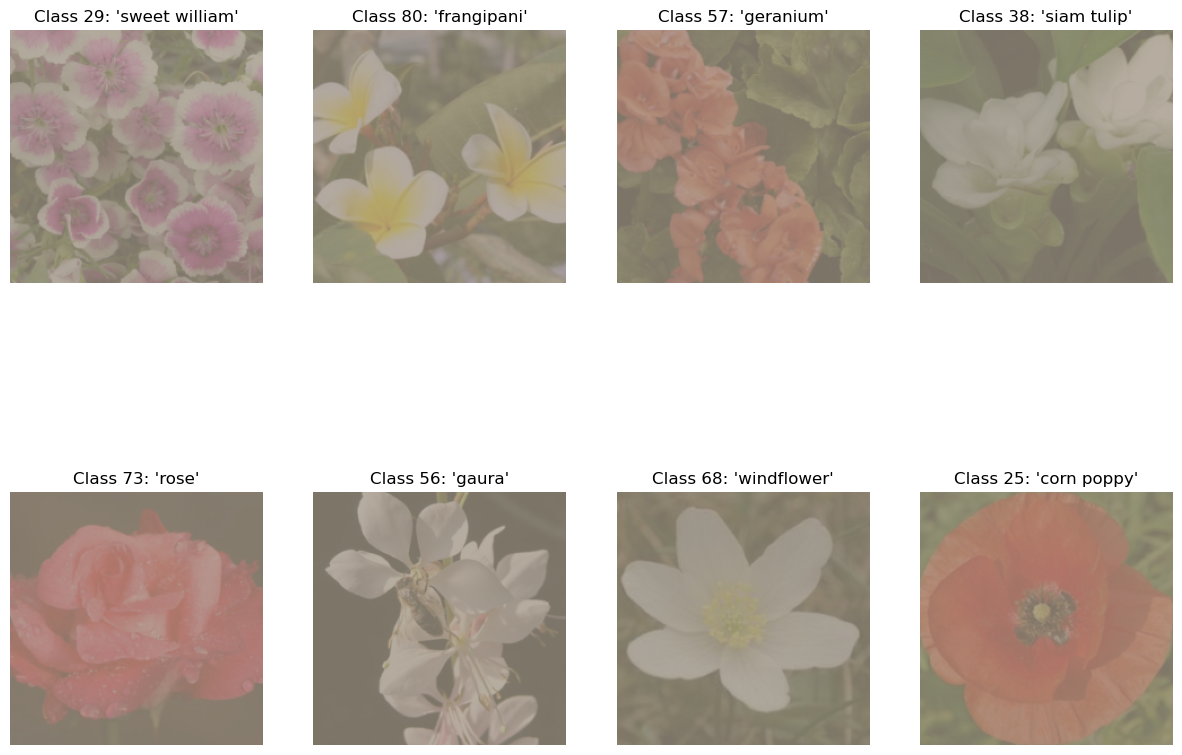

In [ ]:
# Cell 1: Environment Setup
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Cell 2: Dataset Analysis
train_data = datasets.Flowers102(
    root='./data',
    split='train',
    transform=transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ]),
    download=True
)

# Corrected class information access
print(f"Number of Classes: 102 (Fixed - Oxford-102 Flowers Dataset)")  # Manual specification
print(f"Training Samples: {len(train_data)}")

# Cell 3: Visualization (Updated)
# Cell 3: Visualization


# Load class names (must have flower_classes.txt in same folder)
with open('flower_classes.txt') as f:
    class_names = [line.strip() for line in f]
assert len(class_names) == 102, "Need exactly 102 class names"

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
for ax in axs.flat:
    idx = np.random.randint(0, len(train_data))
    img, label = train_data[idx]
    
    # Denormalize image
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    # Handle label offset (Flowers102 uses 0-101 labels)
    ax.imshow(img)
    ax.set_title(f"Class {label}: {class_names[label]}")
    ax.axis('off')
plt.show()